<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Faraday'sLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Faraday's Law</h1></b>

Dr. Bingsen Wang

12/7/2025
</center>

#Python Code

0
0
100
200
300
400
500
0


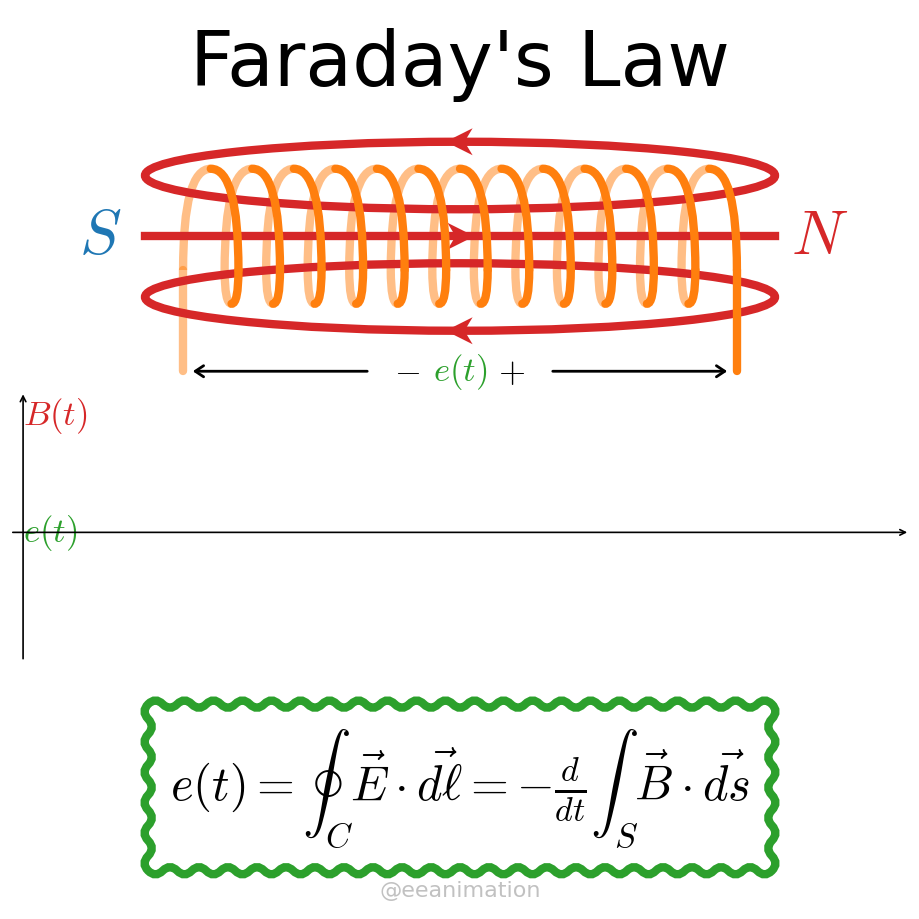

In [141]:
from matplotlib import pyplot,animation,cm,patches,path
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nf=540; wt=np.linspace(0,2*np.pi,Nf)
bt = np.cos(wt)
et=.9*np.sin(wt)
Npts=4; a = np.exp(1j*np.pi*2/Npts)
hc=.5; w=.6
hcs = hc/4
hcl = hc-hcs
Nc = 13 #number of coils
wc = w/Nc #width of coil
wcs = wc/3 #width of small coil
wcl = wcs+wc #width of large coil
lw = 6; #linewidth
hw = .1; #headwidth
hl = .03; #headlength
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]); ax.axis('off')
ax1 = fig.add_axes([0,.575,1,.3], xlim=[-.2,.8],ylim=[-.45,.55]); ax1.axis('off')
ax2 = fig.add_axes([0,.275,1,.3], xlim=[-.1,2*np.pi+.5],ylim=[-1.1,1.2],fc='none'); ax2.axis('off')

ax.text(0,1.1,"Faraday's Law",ha='center',va='center',size=55)
ax.text(0,-.9,r'$e(t)=\oint_C\vec E\cdot \vec{d\ell} = -\frac{d}{dt}\int_S\vec B\cdot \vec{ds}$', size=35,ha='center',multialignment='left',
        bbox=dict(boxstyle='roundtooth',pad=.6,fc='none',ec=cl[2],lw=6))

coilSmallBack = [path.Path([(k*wc,-hcs),(-wcs/2+k*wc,-hcs),(-wcs/2+k*wc,0)], [path.Path.MOVETO]+[path.Path.CURVE3]*2) for k in range(1,Nc)]
coilSmallFront = [path.Path([(k*wc,-hcs),(wcs/2+k*wc,-hcs),(wcs/2+k*wc,0)], [path.Path.MOVETO]+[path.Path.CURVE3]*2) for k in range(1,Nc)]
coilLargeBack = [path.Path([(k*wc+wcl/2-wcs/2,hcl),(-wcs/2+k*wc,hcl),(-wcs/2+k*wc,0)], [path.Path.MOVETO]+[path.Path.CURVE3]*2) for k in range(Nc)]
coilLargeFront = [path.Path([(k*wc+wcl/2-wcs/2,hcl),(wcl-wcs/2+k*wc,hcl),(wcl-wcs/2+k*wc,0)], [path.Path.MOVETO]+[path.Path.CURVE3]*2) for k in range(Nc)]

[ax1.add_patch(patches.PathPatch(coilSmallBack[k],fc='none',ec=cl[1],lw=lw,alpha=.5,zorder=-3)) for k in range(len(coilSmallBack))]
[ax1.add_patch(patches.PathPatch(coilSmallFront[k],fc='none',ec=cl[1],lw=lw,alpha=1,capstyle='round')) for k in range(len(coilSmallFront))]
[ax1.add_patch(patches.PathPatch(coilLargeBack[k],fc='none',ec=cl[1],lw=lw,alpha=.5,zorder=-3)) for k in range(len(coilLargeBack))]
[ax1.add_patch(patches.PathPatch(coilLargeFront[k],fc='none',ec=cl[1],lw=lw,alpha=1,capstyle='round')) for k in range(len(coilLargeFront))]
ax1.plot([-wcs/2,-wcs/2],[0,-hc/4*3],color=cl[1],lw=lw,alpha=.5,zorder=-3,solid_capstyle='round')
ax1.plot([(Nc-1)*wc+wcl-wcs/2,(Nc-1)*wc+wcl-wcs/2],[0,-hc/4*3],color=cl[1],lw=lw,alpha=1,zorder=3,solid_capstyle='round')

hlines = [ax1.plot([-.05,w+.05],[(hcl-hcs)/2]*2,color=cl[0],lw=2,zorder=0)[0]]
hlines += [ax1.add_patch(patches.Ellipse((w/2,hcl-.025),width=w+.1,height=.25,fc='none',ec=cl[0],lw=2,zorder=0,))]
hlines += [ax1.add_patch(patches.Ellipse((w/2,-hcs+.025),width=w+.1,height=.25,fc='none',ec=cl[0],lw=2,zorder=0,))]
harrows = [patches.FancyArrow(0,-(hcs+.1)+(hc/2+.1)*k,dx=0,dy=0,head_length=hl,overhang=.3,width=0,lw=0,zorder=0)for k in range(3)]
[ax1.add_patch(harrows[k]) for k in range(len(harrows))]
txts = [ax1.text([-.1,w+.1][k],(hcl-hcs)/2,'',size=45,ha='center',va='center')for k in range(2)]
ax1.annotate('',xy=(w,-hcs-.25),xytext=(w/2+.1,-hcs-.25),arrowprops=dict(arrowstyle='->,head_length=0.6,head_width=0.4',lw=2))
ax1.annotate('',xy=(0,-hcs-.25),xytext=(w/2-.1,-hcs-.25),arrowprops=dict(arrowstyle='->,head_length=0.6,head_width=0.4',lw=2))
ax1.text(w/2,-hcs-.25,r'$-\hspace{1}\ \hspace{1}+$',size=25,ha='center',va='center')
ax1.text(w/2,-hcs-.25,r'$e(t)$',color=cl[2],size=25,ha='center',va='center')
lines=[ax2.plot([],[],color=[cl[3],cl[0],cl[2]][k],lw=4,solid_capstyle='round')[0] for k in range(3)]
txts += [ax2.text(0,0,['$B(t)$','$e(t)$'][k],c=cl[2],size=25,ha='left',va='center')for k in range(2)]
ax2.annotate('',xy=(2*np.pi+.5,0),xytext=(-.1,0),arrowprops=dict(arrowstyle='->,head_width=0.2',lw=1.2))
ax2.annotate('',xy=(0,1.2),xytext=(0,-1.1),arrowprops=dict(arrowstyle='->,head_width=0.2',lw=1.2))

btpos= np.ma.masked_less(bt,0) #mask the values for segments
btneg= np.ma.masked_greater_equal(bt,0) #mask the values for segments
def animate(i):
  # i=Nf-1
  if i%100==0: print(i)
  btp = int(np.heaviside(bt[i],0))
  [hlines[k].set_linewidth(lw*abs(bt[i]))for k in range(len(hlines))]
  [hlines[k+1].set_edgecolor([cl[0],cl[3]][btp])for k in range(len(hlines)-1)]
  hlines[0].set_color([cl[0],cl[3]][btp])
  [harrows[k].set_data(x=w/2+(-1)**k*hl/2*(2*btp-1),dx=.001*(1-2*btp)*(-1)**k,head_width=hw*np.abs(bt[i])) for k in range(len(harrows))]
  [harrows[k].set_color([cl[0],cl[3]][btp]) for k in range(len(harrows))]
  [txts[k].set_text([['$N$','$S$'],['$S$','$N$']][btp][k])for k in range(2)]
  [txts[k].set_color([[cl[3],cl[0]],[cl[0],cl[3]]][btp][k])for k in range(2)]
  lines[0].set_data(wt[:i+1],btpos[:i+1])
  lines[1].set_data(wt[:i+1],btneg[:i+1])
  lines[2].set_data(wt[:i+1],et[:i+1])
  [txts[k+2].set_position((wt[i],[bt[i],et[i]][k]))for k in range(2)]
  txts[2].set_color([cl[0],cl[3]][btp])
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=16,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("FaradaysLaw.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)